# <span style="color:#F72585">Tensores</span>

Introducción

<figure>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Fundamentacion_Matematica/Imagenes/producto_tensorial.png" width="600" height="300" /> 
</figure>

Fuente: Alvaro Montenegro

## <span style="color:#4361EE">Introducción</span>

En esta lección aprenderemos los conceptos básicos de tensores y como los usamos para manipular imágenes usando tensores.

## <span style="color:#4361EE">Tensor</span>

Un tensor es un concepto matemático que generaliza los conceptos de escalares, vectores y matrices.

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Fundamentacion_Matematica/Imagenes/tensores.png" width="600" height="300" /> 
</center>
</figure>

Fuente: Alvaro Montenegro

En términos muy simples, un tensor es un objeto dinámico (*matemáticamente diríamos que es una función entre espacios vectoriales*) que vive dentro de una estructura. 

Pero no vamos a hacer un tratado matemático aquí. 

Lo importante en esta clase es entender que en realidad, escalares, vectores, matrices pueden verse como tensores fijos y eso será suficiente para lo que sigue.

## <span style="color:#4361EE">Rango</span>

Diremos que los escalares tienen rango (*shape*) 0, los vectores tiene rango 1, las matrices rango 2 y el tensor de la derecha rango 3. 

El rango corresponde al número de índices que se requiere para identificar de manera única a cada elemento del tensor.

Observe que por ejemplo, en el último tensor, requiere (fila, columna, cajón). 

También podría ser (cajón, fila, columna).

## <span style="color:#4361EE">Redes Neuronales</span>

La siguiente imagen muestra el estado en un instante de una una parte oculta de una red  neuronal profunda.

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Fundamentacion_Matematica/Imagenes/fragmento_red.png" width="500" height="300" /> 
</center>
</figure>

Fuente: Alvaro Montenegro

El proceso puede modelarse en forma simplificada usando matrices y vectores como se ve a continuación.

$$
W_{12}L_1 = L2 \to \begin{pmatrix} -1 & 0.4 & 1.5\\ 0.8 & 0.5 & 0.75 \\ 0.2 & -0.3  & 1\\ \end{pmatrix}\begin{pmatrix} 2.5\\ 4  \\ 1.2 \end{pmatrix} = \begin{pmatrix} 0.9\\ 4.9 \\ 0.5 \end{pmatrix}
$$

Observe por ejemplo que:

$$-1\times 2.5 + 0.4\times 4  + 1.5\times 1.2 = 0.9$$

En la fase de entrenamiento de la red neuronal, los pesos de la matriz se van modificando hasta que se encuentra un óptimo local. Este proceso ocurre en toda la estructura de la red.

Por lo que no parece extraño que las GPU y las  TPU pasen todo el tiempo haciendo operaciones de este tipo, que al final se reduce a sumas y multiplicaciones.

Por otro lado, lo que ocurre es que los objetos que se procesan no necesariamente son vectores como en el ejemplo, y esto lleva a la necesidad de generalizar los conceptos.


## <span style="color:#4361EE">Producto tensorial</span>

La operación más ejecutada en aprendizaje profundo es el producto tensorial.

Vamos a suponer que cada elemento en los tensores de rango 3 se indexan mediante coordenadas (fila, columna, profundidad) y que los tensores de rango 2 se indexan como (fila, columna).

La siguiente imagen ilustra la forma de un producto tensorial. 

- A la izquierda (azul) se tiene un tensor de tamaño digamos $n \times p \times s$. 

- El tensor que está operando en el centro (rosa) es  de tamaño $p \times r$. Este actúa operando en este caso sobre cada capa del tensor de la izquierda haciendo un producto usual de matrices. 

- Por lo que el tensor resultante (verde) a la derecha tiene tamaño $n \times r \times s$



<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Fundamentacion_Matematica/Imagenes/producto_tensorial.png" width="600" height="300" /> 
</center>
</figure>

Fuente: Alvaro Montenegro

## <span style="color:#4361EE">Explicación del producto</span>

La explicación del proceso es la siguiente:

Cada capa frontal del tensor azul es multiplica por el tensor rosa y el resultado es colocando como una capa frontal en el tensor resultante (verde).

Cada multiplicación es entre dos matrices (azul * rosa) y el resultado es una matriz (verde).

Cada multiplicación de matrices se hace por la fórmula fila (matriz azul) * columna (matriz rosa)

Vamos por ejemplo a suponer que una capa roja es $ azul  = \begin{pmatrix} 1 & 2 & 1\\ 3 & 4 & 1 \\ 4 & 5  & 0\\ \end{pmatrix}$, $rosa = \begin{pmatrix} 5 & 10\\ 20 & 30 \\ 4 & 1\end{pmatrix}$

Entonces se tiene que 

$$
azul \times rosa = \begin{pmatrix} 1 & 2 & 1\\ 3 & 4 & 1 \\ 4 & 5 & 0\\ \end{pmatrix} \times \begin{pmatrix} 5 & 10\\ 20 & 30\\ 4 & 1\end{pmatrix} = \begin{pmatrix} 1\times 5 + 2 \times 20 +  1 \times 4 & 1 \times 10 + 2\times 30 + 1\times 1
\\ 3\times 5 + 4 \times 20 + 1 \times 4 & 3 \times 10 + 4 \times 30 + 1 \times 1
\\ 4\times 5 + 5 \times 20 + 0 \times 4 & 4 \times 10 + 5 \times 30 + 0 \times 1\end{pmatrix} = turquesa
$$

## <span style="color:#4361EE">Imágenes a color</span>

De manera clásica una imagen a color está compuesta de tres colores primarios: rojo (*Red*), verde (*Green*) y azul (*Blue*). Para generar una imagen a color un computador maneja tres planos de color, los cuales son controlados desde tensores tridimensionales. Considere el siguiente ejemplo.

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Fundamentacion_Matematica/Imagenes/zeus_2.png" width="600" height="300" /> 
</center>
</figure>

Fuente: Alvaro Montenegro

Cada pixel (*punto*) de la imagen es representado por una valor numérico en el rango de 0 a 255, o en rango de valores reales entre cero y 1.

## <span style="color:#4361EE">Construcción aleatoria de una imagen</span>

Considere el siguiente código Python.

In [1]:
import numpy as np
I=np.random.randint(0,255,size=(3,10,10))
print(I)

[[[ 33 178  40 103 237 164  90 226   2 121]
  [227  39 170  18 230 221  25 182 151  10]
  [ 67  12 234 117 119 159 183 169 146 172]
  [ 28  64  33 129   8 238  20  85 139  49]
  [253 124   3 182 139 118  37 125 208 131]
  [199  44 109  67 200 219 227 187  45   1]
  [ 10  33  32 112   6 186 196  33 176   1]
  [234 181 191 219 133  47  66 169  66  47]
  [ 32 225 137 155 166 104 249  77 162 194]
  [196  19  47  80 215  38  23  71 229  68]]

 [[ 38 110 175  87  48 227 144   2  65  49]
  [192  35 112 193  53 102   6  24 156 152]
  [135  91  82  97 114 162 174   9 125 196]
  [248   2 154 146 220 100 134 151  48 212]
  [193 242  22 111   1 205 238 168 202  19]
  [191 188  37 212 176 191  26  96 180  84]
  [179 174 231 220  44  56 146  25 117  60]
  [178 223 123 150  73   0 104  99 227 155]
  [110 124  82 113  75 249 200 232 176 136]
  [ 52 147  89  45 185  86  85 137 205 251]]

 [[245  48 244 221  30 156  71 240 128 215]
  [156 139  67 143  96 124 252  20  25  95]
  [150 183 212 201  84  54 1

Este tensor representa una imagen de tamaño $10 \times 10$. Son tres planos de color $10 \times 10$.

Observe que la primera dimensión corresponde a cada plano de color y las restantes dos dimensiones a las intensidades de cada color para cada punto.

Renderizar (dibujar en este caso), nos lleva a la siguiente imagen.

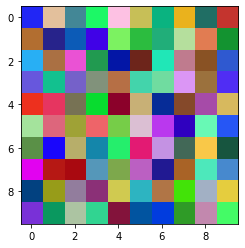

In [2]:
# conda install -c conda-forge matplotlib
import matplotlib.pyplot as plt

plt.imshow(I.T)
plt.show()


Observe que 

In [3]:
(I.T).shape

(10, 10, 3)

Porque Python maneja las imágenes en este formato: Fila, columna y plano de color.

## <span style="color:#4361EE">Imagen real</span>

Vamos a trabajar ahora con una imagen real.

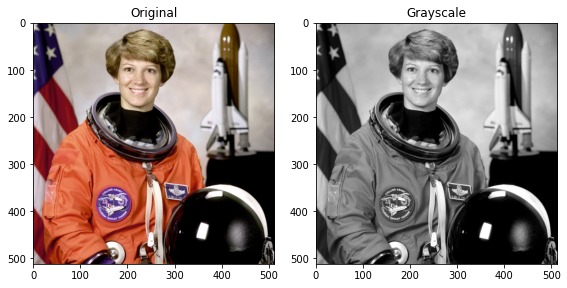

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# conda install -c anaconda scikit-image
from skimage import data
from skimage.color import rgb2gray

original = data.astronaut()
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

In [5]:
Idata=np.array(grayscale)
print("\nLa imagen tiene forma: ",Idata.shape,"\n")
print(Idata)


La imagen tiene forma:  (512, 512) 

[[5.83434902e-01 4.14859216e-01 2.44058431e-01 ... 4.75007843e-01
  4.58213333e-01 4.69121961e-01]
 [6.75588235e-01 5.56006667e-01 4.49052941e-01 ... 4.68548627e-01
  4.56501176e-01 4.55958431e-01]
 [7.66334902e-01 7.00524314e-01 6.49276078e-01 ... 4.76406667e-01
  4.62104314e-01 4.53978431e-01]
 ...
 [6.81696471e-01 6.81979216e-01 6.71889020e-01 ... 0.00000000e+00
  2.82745098e-04 0.00000000e+00]
 [6.74694510e-01 6.68532941e-01 6.64030196e-01 ... 2.82745098e-04
  3.92156863e-03 0.00000000e+00]
 [6.70482353e-01 6.63189804e-01 6.52838824e-01 ... 0.00000000e+00
  3.92156863e-03 0.00000000e+00]]


## <span style="color:#4361EE">Planos de color</span>

In [6]:
Idata = np.array(original)
print("\nLa imagen tiene forma: ",Idata.shape,"\n")
print("\nEscala de Rojos:\n\n",Idata[:511,:511,0],"\n")
print("\nEscala de Verdes:\n\n",Idata[:511,:511,1],"\n")
print("\nEscala de Azules:\n\n",Idata[:511,:511,2],"\n")


La imagen tiene forma:  (512, 512, 3) 


Escala de Rojos:

 [[154 109  63 ... 126 127 120]
 [177 144 113 ... 126 127 124]
 [201 182 168 ... 125 128 126]
 ...
 [186 188 184 ...   0   0   0]
 [186 186 183 ...   2   0   0]
 [183 182 185 ...  21   0   1]] 


Escala de Verdes:

 [[147 103  58 ... 120 120 117]
 [171 141 114 ... 118 118 115]
 [194 178 165 ... 119 120 116]
 ...
 [169 169 167 ...   0   0   0]
 [170 170 168 ...   2   0   0]
 [169 167 164 ...  21   0   1]] 


Escala de Azules:

 [[151 124 102 ... 114 115 106]
 [171 143 124 ... 111 112 108]
 [193 175 164 ... 113 117 112]
 ...
 [174 177 170 ...   0   0   1]
 [176 177 170 ...   3   0   1]
 [170 171 176 ...  16   1   1]] 



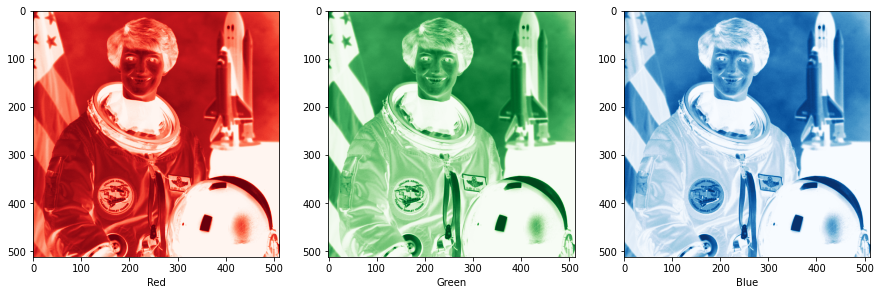

In [7]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,15))

ax1.imshow(Idata[:,:,0],cmap="Reds")
ax1.set_xlabel('Red')
ax2.imshow(Idata[:,:,1],cmap="Greens")
ax2.set_xlabel('Green')
ax3.imshow(Idata[:,:,2],cmap="Blues")
ax3.set_xlabel('Blue')
plt.show()

## <span style="color:#4361EE">Manipulación  de imágenes</span>

### <span style="color:#4CC9F0">Intercambia dos planos de color</span>

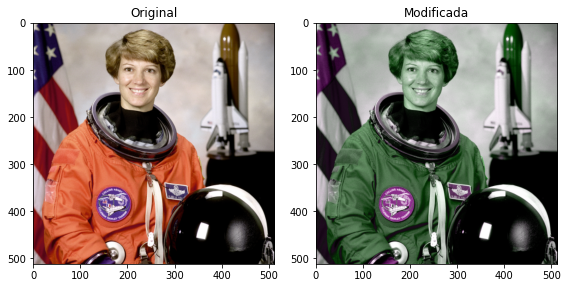

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray

original = data.astronaut()

Idata_m = Idata
Idata_m[:,:,0], Idata_m[:,:,2] = Idata_m[:,:,2], Idata_m[:,:,0]

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(Idata_m)
ax[1].set_title("Modificada")

fig.tight_layout()
plt.show()

### <span style="color:#4CC9F0">Suma una constante a la imagen</span>

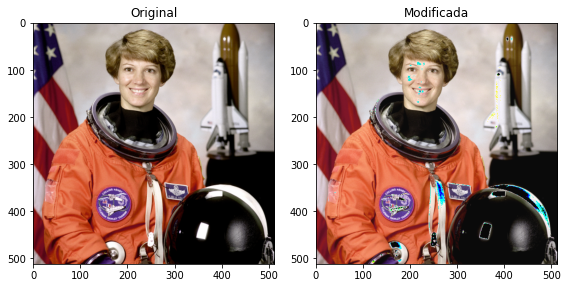

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

k = 10
ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(original + k)
ax[1].set_title("Modificada")

fig.tight_layout()
plt.show()

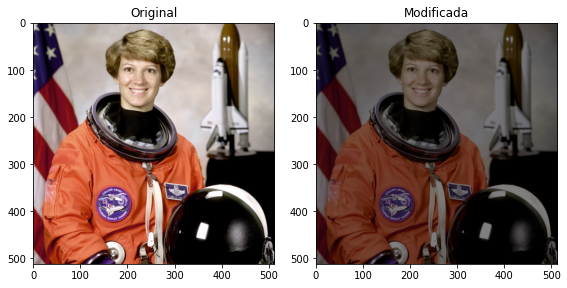

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

k = 2
ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(original //k)
ax[1].set_title("Modificada")

fig.tight_layout()
plt.show()

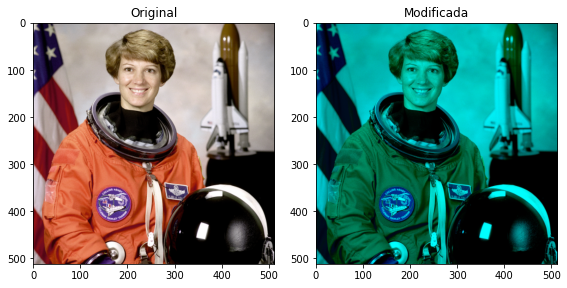

In [11]:
Idata_m = Idata

Idata_m[:,:,0 ]=0

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(Idata_m)
ax[1].set_title("Modificada")

fig.tight_layout()
plt.show()

In [12]:
Idata

array([[[  0, 147, 151],
        [  0, 103, 124],
        [  0,  58, 102],
        ...,
        [  0, 120, 115],
        [  0, 117, 106],
        [  0, 119, 110]],

       [[  0, 171, 171],
        [  0, 141, 143],
        [  0, 114, 124],
        ...,
        [  0, 118, 112],
        [  0, 115, 108],
        [  0, 116, 105]],

       [[  0, 194, 193],
        [  0, 178, 175],
        [  0, 165, 164],
        ...,
        [  0, 120, 117],
        [  0, 116, 112],
        [  0, 114, 109]],

       ...,

       [[  0, 170, 176],
        [  0, 170, 177],
        [  0, 168, 170],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[  0, 169, 170],
        [  0, 167, 171],
        [  0, 164, 176],
        ...,
        [  0,   0,   1],
        [  0,   1,   1],
        [  0,   0,   0]],

       [[  0, 167, 172],
        [  0, 165, 169],
        [  0, 162, 171],
        ...,
        [  0,   0,   0],
        [  0,   1,   1],
        [  0,   0,   0]]

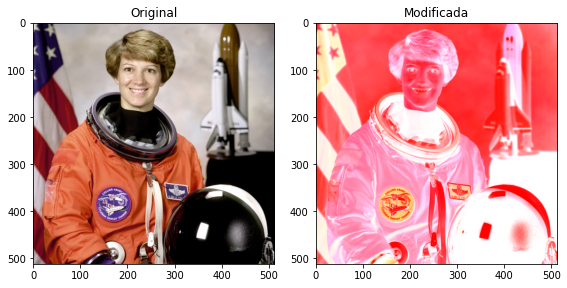

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(255 - Idata)
ax[1].set_title("Modificada")

fig.tight_layout()
plt.show()

## <span style="color:#4361EE">Colocar dos imagenes en un tensor</span>

Esta es una forma para organizar conjuntos de imágenes en un único tensor

In [14]:
original= np.expand_dims(original,axis=0)

In [15]:
original.shape

(1, 512, 512, 3)

In [16]:
Idata_m= np.expand_dims(Idata_m,axis=0)

In [17]:
images = np.concatenate((original, Idata_m),axis=0)

In [18]:
images.shape

(2, 512, 512, 3)

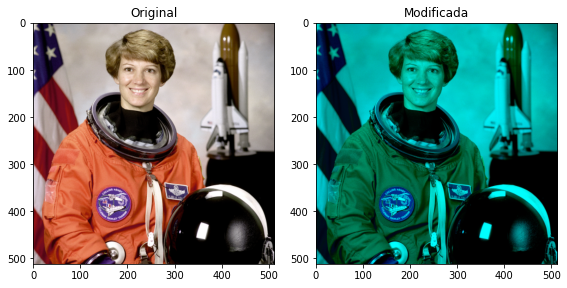

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(images[0])
ax[0].set_title("Original")
ax[1].imshow(images[1])
ax[1].set_title("Modificada")

fig.tight_layout()
plt.show()

## <span style="color:#4361EE">Trasformaciones afines</span>

En este ejemplo usaremos la librería OpenCV.

Esta es la imagen original tomada de [omes-va.com](https://omes-va.com/trasladar-rotar-escalar-recortar-una-imagen-opencv/). Código tomado del mismo sitio.

In [20]:
import numpy as np
import cv2
image = cv2.imread('../Imagenes/ave.jpeg')
#cv2.imshow('Imagen de entrada',image)
cv2.waitKey(0)
cv2.destroyAllWindows()


## <span style="color:#4361EE">Translación</span>

$$
M =\begin{pmatrix} 1 & 0 & Tx\\
0 & 1 & Ty
\end{pmatrix}
$$

- Tx, representa el desplazamiento en x.

- Ty, representa el desplazamiento en y.



In [21]:
# Translación
ancho = image.shape[1] #columnas
alto = image.shape[0] # filas
# Traslación
M = np.float32([[1,0,100],[0,1,150]])
imageOut = cv2.warpAffine(image,M,(ancho,alto))
cv2.imshow('Imagen de entrada',image)
cv2.imshow('Imagen de salida',imageOut)
cv2.waitKey(0)
cv2.destroyAllWindows()

## <span style="color:#4361EE">Rotación</span>

$$
M =\begin{pmatrix} \cos \theta & -\sin \theta & 0\\
\cos \theta & \sin \theta & 1\\
0 & 0  & 1
\end{pmatrix}
$$

- $\theta$ representa el ángulo de rotación. En este ejemplo $\theta = \pi/4$ 0 lo que es lo mismo $45^o$.

In [ ]:
# rotación
ancho = image.shape[1] #columnas
alto = image.shape[0] # filas

M = cv2.getRotationMatrix2D((ancho//2,alto//2),15,1)
imageOut = cv2.warpAffine(image,M,(ancho,alto))
cv2.imshow('Imagen de entrada',image)
cv2.imshow('Imagen de salida',imageOut)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
image.shape

(426, 640, 3)